Hugging face

https://huggingface.co/docs/api-inference/detailed_parameters

In [1]:
import requests
import pandas as pd
import os

In [2]:
API_TOKEN = open('Token.txt').read().strip()

#API_TOKEN = "EL TOKEN"

In [3]:
headers = {"Authorization": f"Bearer {API_TOKEN}"}
API_URL = "https://api-inference.huggingface.co/models/facebook/musicgen-small"

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.content

audio_bytes = query({
	"inputs": "techno and clasic music",
})
# You can access the audio with IPython.display for example
from IPython.display import Audio
Audio(audio_bytes)

In [4]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

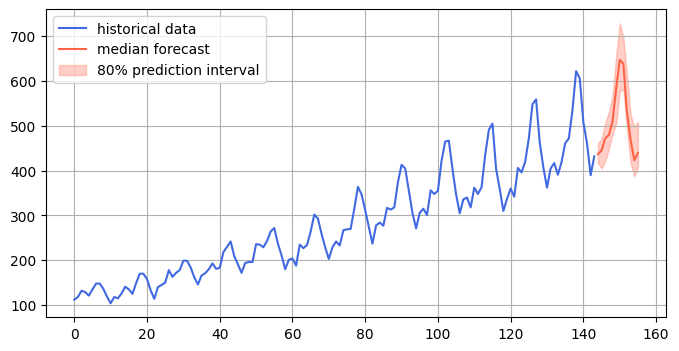

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["#Passengers"])
prediction_length = 12
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()


Zero-Shot Classification task

Refunds

In [6]:
headers = {"Authorization": f"Bearer {API_TOKEN}"}
API_URL = "https://api-inference.huggingface.co/models/facebook/bart-large-mnli"
def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()
data = query(
    {
        "inputs": "Hi, I recently bought a device from your company but it is not working as advertised and I would like to get reimbursed!",
        "parameters": {"candidate_labels": ["refund", "legal", "faq"]},
    }
)

In [7]:
data

{'sequence': 'Hi, I recently bought a device from your company but it is not working as advertised and I would like to get reimbursed!',
 'labels': ['refund', 'faq', 'legal'],
 'scores': [0.8777878284454346, 0.10522636026144028, 0.01698581501841545]}

In [8]:
type(data)

dict

In [9]:
def get_highest_score_label(data):
    max_index = data['scores'].index(max(data['scores']))
    highest_label = data['labels'][max_index]
    return f"This sentence refers to {highest_label}"

get_highest_score_label(data)

'This sentence refers to refund'

Likeness

In [10]:
headers = {"Authorization": f"Bearer {API_TOKEN}"}
API_URL = "https://api-inference.huggingface.co/models/facebook/bart-large-mnli"
def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()
data = query(
    {
        "inputs": "I love this product",
        "parameters": {"candidate_labels": ["good", "intermediate", "bad"]},
    }
)

In [11]:
data

{'sequence': 'I love this product',
 'labels': ['good', 'intermediate', 'bad'],
 'scores': [0.9609351754188538, 0.03776165097951889, 0.0013031655689701438]}

In [12]:
def get_highest_score_label(data):
    max_index = data['scores'].index(max(data['scores']))
    highest_label = data['labels'][max_index]
    return f"This opinion is {highest_label}"

get_highest_score_label(data)

'This opinion is good'

Multiple inputs

In [13]:
headers = {"Authorization": f"Bearer {API_TOKEN}"}
API_URL = "https://api-inference.huggingface.co/models/facebook/bart-large-mnli"

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()


def query_multiple_inputs(inputs_list, candidate_labels):
    results = []
    
    for input_text in inputs_list:
        payload = {
            "inputs": input_text,
            "parameters": {"candidate_labels": candidate_labels},
        }
        result = query(payload)
        results.append(result)
    
    return results

In [14]:
inputs = ["I love this product", "This is not what I expected", "Not good nor bad"]
candidate_labels = ["good", "neutral", "bad"]

In [15]:
data = query_multiple_inputs(inputs, candidate_labels)

data

[{'sequence': 'I love this product',
  'labels': ['good', 'neutral', 'bad'],
  'scores': [0.9883801341056824, 0.01027941145002842, 0.001340384827926755]},
 {'sequence': 'This is not what I expected',
  'labels': ['bad', 'good', 'neutral'],
  'scores': [0.9213561415672302, 0.04466470703482628, 0.033979207277297974]},
 {'sequence': 'Not good nor bad',
  'labels': ['neutral', 'bad', 'good'],
  'scores': [0.9343570470809937, 0.0434410497546196, 0.022201845422387123]}]

In [16]:
def process_dict_to_dataframe(data_dict):
    sequences = []
    top_labels = []
    top_scores = []
    for entry in data_dict:
        sequences.append(entry['sequence'])
        max_index = entry['scores'].index(max(entry['scores']))
        top_labels.append(entry['labels'][max_index])
        top_scores.append(entry['scores'][max_index])
    df = pd.DataFrame({
        'Frase': sequences,
        'Etiqueta con Mayor Puntuación': top_labels,
        'Puntuación': top_scores
    })
    
    return df

In [17]:
df = process_dict_to_dataframe(data)
df

,Frase,Etiqueta con Mayor Puntuación,Puntuación
0,I love this product,good,0.988380
1,This is not what I expected,bad,0.921356
2,Not good nor bad,neutral,0.934357


Text classification

In [18]:
headers = {"Authorization": f"Bearer {API_TOKEN}"}
API_URL = "https://api-inference.huggingface.co/models/distilbert-base-uncased-finetuned-sst-2-english"
def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()
data = query({"inputs": "I like you. I love you"})
data

[[{'label': 'POSITIVE', 'score': 0.9998738765716553},
  {'label': 'NEGATIVE', 'score': 0.0001261125726159662}]]

In [19]:
#MULTIPLE

headers = {"Authorization": f"Bearer {API_TOKEN}"}
API_URL = "https://api-inference.huggingface.co/models/distilbert-base-uncased-finetuned-sst-2-english"

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()


def query_multiple_inputs_class (inputs_list):
    results = []
    
    for input_text in inputs_list:
        payload = {
            "inputs": input_text,
        }
        result = query(payload)
        results.append(result)
    
    return results

In [20]:
inputs = ["I love this product", "This is not what I expected", "It works fine, but could be better"]

data = query_multiple_inputs_class(inputs)

In [21]:
data

[[[{'label': 'POSITIVE', 'score': 0.9998788833618164},
   {'label': 'NEGATIVE', 'score': 0.00012105619680369273}]],
 [[{'label': 'NEGATIVE', 'score': 0.9997480511665344},
   {'label': 'POSITIVE', 'score': 0.0002519444387871772}]],
 [[{'label': 'POSITIVE', 'score': 0.9944763779640198},
   {'label': 'NEGATIVE', 'score': 0.005523692816495895}]]]

Image recognition

In [22]:
import json
import requests
headers = {"Authorization": f"Bearer {API_TOKEN}"}
API_URL = "https://api-inference.huggingface.co/models/google/vit-base-patch16-224"
def query(filename):
    with open(filename, "rb") as f:
        data = f.read()
    response = requests.request("POST", API_URL, headers=headers, data=data)
    return json.loads(response.content.decode("utf-8"))
data = query("cats.jpg")
data

[{'label': 'Egyptian cat', 'score': 0.6198727488517761},
 {'label': 'tiger cat', 'score': 0.29018235206604004},
 {'label': 'tabby, tabby cat', 'score': 0.04019594192504883},
 {'label': 'lynx, catamount', 'score': 0.01030184980481863},
 {'label': 'Persian cat', 'score': 0.004244023468345404}]

In [23]:
possible_dog = query("dog.jpg")
possible_dog

[{'label': 'Egyptian cat', 'score': 0.6143907904624939},
 {'label': 'tiger cat', 'score': 0.1884855031967163},
 {'label': 'tabby, tabby cat', 'score': 0.1798524111509323},
 {'label': 'lynx, catamount', 'score': 0.0050388663075864315},
 {'label': 'Siamese cat, Siamese', 'score': 0.000557830324396491}]

In [24]:
house = query("house.jpg")
house

[{'label': 'patio, terrace', 'score': 0.26827412843704224},
 {'label': 'palace', 'score': 0.04998278245329857},
 {'label': 'boathouse', 'score': 0.049633320420980453},
 {'label': 'tile roof', 'score': 0.04291205108165741},
 {'label': 'mobile home, manufactured home', 'score': 0.03886718675494194}]

In [25]:
house1 = query("house1.jpg")
house1

[{'label': 'boathouse', 'score': 0.2831631898880005},
 {'label': 'barn', 'score': 0.152216374874115},
 {'label': 'picket fence, paling', 'score': 0.12848861515522003},
 {'label': 'tile roof', 'score': 0.04053594172000885},
 {'label': 'birdhouse', 'score': 0.030993184074759483}]

In [26]:
trump = query("trump.jpg")
trump

[{'label': 'Windsor tie', 'score': 0.12037745863199234},
 {'label': 'suit, suit of clothes', 'score': 0.08712882548570633},
 {'label': "academic gown, academic robe, judge's robe",
  'score': 0.01740042306482792},
 {'label': 'flagpole, flagstaff', 'score': 0.01593775860965252},
 {'label': 'bearskin, busby, shako', 'score': 0.0115365507081151}]